In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
print(f"training sample:\n{train_data[0]}\n")
print(f"training label:\n{train_labels[0]}\n")

training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

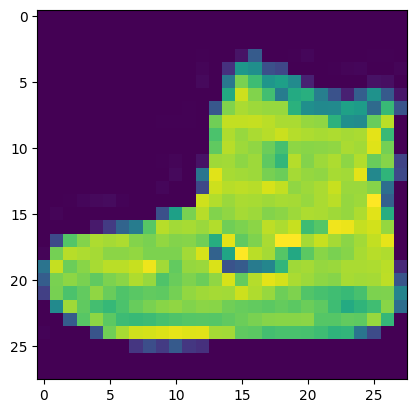

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

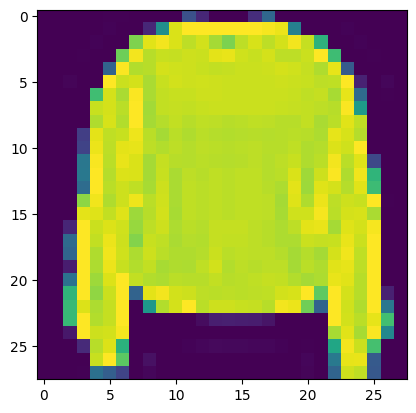

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
train_labels[7]

2

In [ ]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

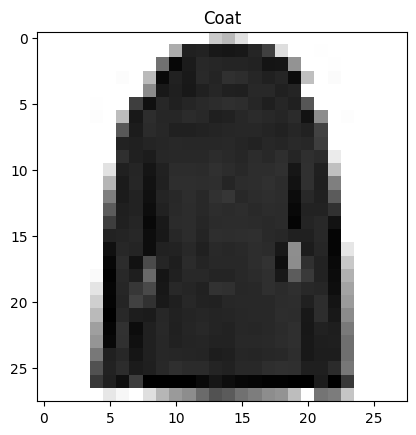

In [ ]:
index_of_choice = 2000
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

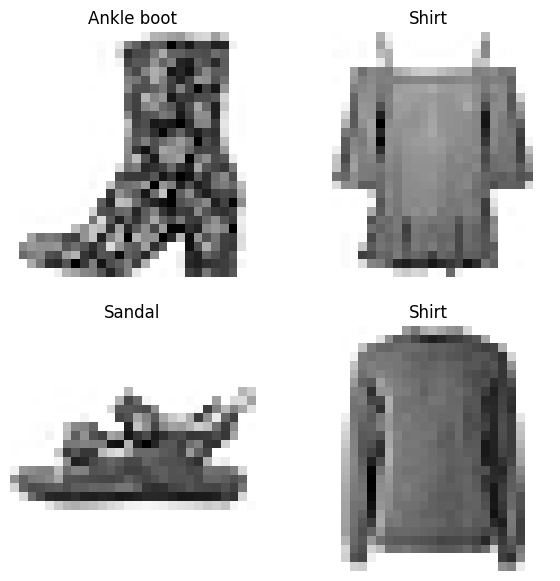

In [ ]:
import random

plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
len(class_names)

10

In [ ]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
28*28

784

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
train_data.min(),train_data.max()

(0, 255)

In [ ]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data_norm,
             train_labels,
             epochs=10,
             validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.0918 - accuracy: 0.5796 - val_loss: 0.7806 - val_accuracy: 0.7224
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7032 - accuracy: 0.7577 - val_loss: 0.6829 - val_accuracy: 0.7795
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6238 - accuracy: 0.7904 - val_loss: 0.6278 - val_accuracy: 0.7917
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5912 - accuracy: 0.7988 - val_loss: 0.6024 - val_accuracy: 0.8020
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5702 - accuracy: 0.8048 - val_loss: 0.5869 - val_accuracy: 0.8061
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5535 - accuracy: 0.8107 - val_loss: 0.5854 - val_accuracy: 0.8050
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5392 - accuracy: 0.8157 - val_loss: 0.5787 - val_accur

<Axes: title={'center': 'Normalized data'}>

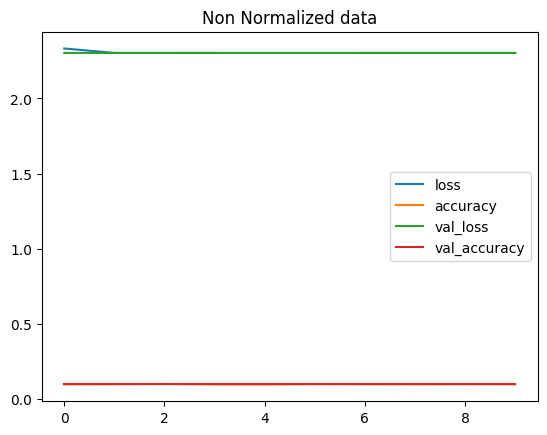

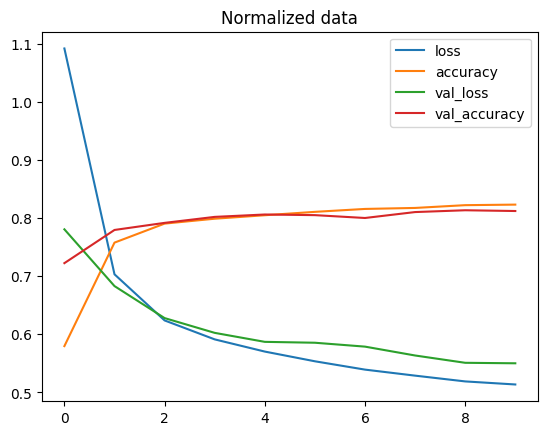

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non Normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [ ]:
tf.random.set_seed(42)
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm,test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 9s 4ms/step - loss: 1.3751 - accuracy: 0.5037 - val_loss: 0.9015 - val_accuracy: 0.6812 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7427 - accuracy: 0.7267 - val_loss: 0.6962 - val_accuracy: 0.7324 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6470 - accuracy: 0.7638 - val_loss: 0.6557 - val_accuracy: 0.7580 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6100 - accuracy: 0.7803 - val_loss: 0.6480 - val_accuracy: 0.7650 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5922 - accuracy: 0.7901 - val_loss: 0.6157 - val_accuracy: 0.7813 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5763 - accuracy: 0.7986 - val_loss: 0.6407 - val_accuracy: 0.7733 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding the ideal learing rete')

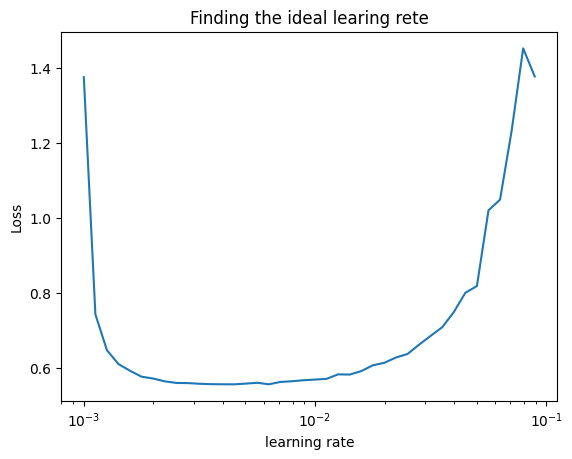

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learing rete")

In [ ]:
10 **-3

0.001

In [ ]:
tf.random.set_seed(42)
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

norm_history_14 = model_14.fit(train_data_norm,
             train_labels,
             epochs=20,
             validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1701 - accuracy: 0.6090 - val_loss: 0.8127 - val_accuracy: 0.7528
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7276 - accuracy: 0.7668 - val_loss: 0.7011 - val_accuracy: 0.7699
Epoch 3/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6461 - accuracy: 0.7833 - val_loss: 0.6499 - val_accuracy: 0.7795
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6099 - accuracy: 0.7917 - val_loss: 0.6345 - val_accuracy: 0.7836
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5922 - accuracy: 0.7983 - val_loss: 0.6338 - val_accuracy: 0.7803
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5799 - accuracy: 0.8005 - val_loss: 0.6167 - val_accuracy: 0.7868
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5717 - accuracy: 0.8022 - val_loss: 0.6361 - val_accuracy:

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_probs = model_14.predict(test_data_norm) 
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[6.23939557e-16, 4.95606334e-11, 2.28715095e-07, 2.56868485e-16,
        1.71571199e-04, 8.42340961e-02, 2.65263922e-10, 6.28703386e-02,
        2.47464312e-04, 8.52476299e-01],
       [1.76258298e-04, 5.27460497e-12, 8.67340982e-01, 1.38556033e-11,
        9.27918330e-02, 1.09921134e-14, 3.96906622e-02, 4.47690081e-23,
        2.12213763e-07, 2.81310553e-09],
       [1.06424594e-03, 9.70927894e-01, 1.29608240e-03, 1.89253762e-02,
        3.93132039e-04, 4.21989383e-03, 4.95094049e-04, 2.37938808e-03,
        1.27145569e-04, 1.71823005e-04],
       [1.25333900e-03, 9.65671301e-01, 1.49008562e-03, 2.18394585e-02,
        4.61729825e-04, 5.48329763e-03, 5.71742246e-04, 2.87137297e-03,
        1.56574926e-04, 2.01102375e-04],
       [1.28927201e-01, 4.52162186e-03, 3.18612248e-01, 8.42375495e-03,
        1.00877196e-01, 1.97914196e-09, 4.38104779e-01, 1.56515981e-11,
        5.32878039e-04, 2.38662039e-07]], dtype=float32)

In [ ]:
y_probs[0]

array([6.2393956e-16, 4.9560633e-11, 2.2871509e-07, 2.5686849e-16,
       1.7157120e-04, 8.4234096e-02, 2.6526392e-10, 6.2870339e-02,
       2.4746431e-04, 8.5247630e-01], dtype=float32)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_probs[0], tf.argmax(y_probs[0])

(array([6.2393956e-16, 4.9560633e-11, 2.2871509e-07, 2.5686849e-16,
        1.7157120e-04, 8.4234096e-02, 2.6526392e-10, 6.2870339e-02,
        2.4746431e-04, 8.5247630e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([6.2393956e-16, 4.9560633e-11, 2.2871509e-07, 2.5686849e-16,
        1.7157120e-04, 8.4234096e-02, 2.6526392e-10, 6.2870339e-02,
        2.4746431e-04, 8.5247630e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
y_pred = y_probs.argmax(axis=1)
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
import random
def plot_random_image(model,images,true_labels,classes):
  """
  picks a random image,plots it and labels it with a prediction and truth label.
  """
  i = random.randint(0,len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = [true_labels[i]]

  plt.imshow(target_image,cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("pred: {} {:2.0f}%(True: {})".format(pred_label,
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label),
             color=color)  

1/1 [==============================] - 0s 52ms/step


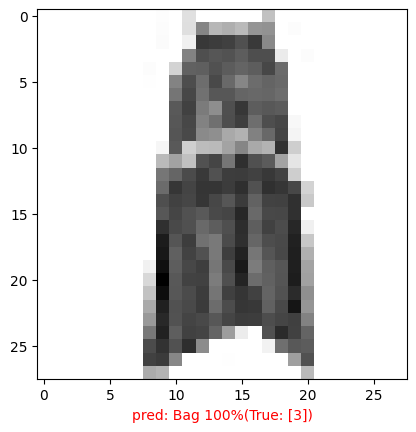

In [ ]:
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [ ]:
model_14.layers

In [ ]:
model_14.layers[1]

In [ ]:
weigths,biases = model_14.layers[1].get_weights()
weigths, weigths.shape

(array([[-0.03147522,  0.7876385 , -0.41061068, -0.05601064],
        [-0.25006303,  0.2853529 ,  0.59263766,  0.57578677],
        [-0.68767333,  1.1761781 ,  0.55668044,  0.5637413 ],
        ...,
        [ 0.19736071, -0.2634265 ,  0.74528635, -0.16221723],
        [ 0.07179734, -0.02368958,  0.74903774,  0.40810445],
        [-0.30830044,  0.2602193 ,  0.2716731 ,  0.00746316]],
       dtype=float32),
 (784, 4))

In [ ]:
28*28

784

In [ ]:
model_14.summary()

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_27 (Flatten)        (None, 784)               0         
                                                                 
 dense_139 (Dense)           (None, 4)                 3140      
                                                                 
 dense_140 (Dense)           (None, 4)                 20        
                                                                 
 dense_141 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


now let's check out the bias vector

In [ ]:
biases, biases.shape

(array([ 1.8520437,  2.049809 ,  1.4831795, -0.7959072], dtype=float32), (4,))

weight matrix has one value per data point and bias vector has only one value in per hidden layer

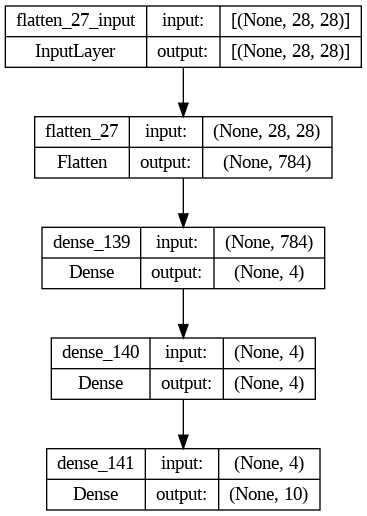

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_14,show_shapes=True)